# Big Data and Policing
---
### The report consists of solutions to Question 1 of Homework 3.
---
Author : Kushagra Nagori
---

In [1]:
import csv
import os
import sys
from PIL import Image, ExifTags
from matplotlib import pyplot as plt
from collections import OrderedDict
import datetime
from math import pi
path = "./Isis Admin's Hacked Phones"

# Part 1

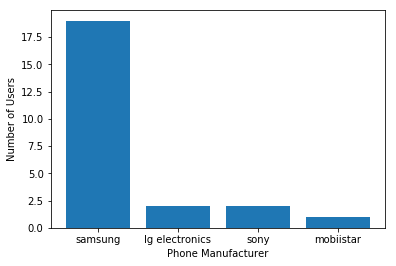

In [2]:
manufacturer ={}

for root, dirs, files in os.walk(path):
    check = 0
    for name in files:
        if (name.endswith("jpeg") or name.endswith("jpg")) and ('camera' in root.lower()) and check==0:
            check+=1
            a=root+'/'+name
            img = Image.open((a))
            try:
                exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
            except AttributeError:
                pass
            
            b = exif['Make'].lower().rstrip('\x00')
            
            if b in manufacturer:
                manufacturer[b]+=1
            else:
                manufacturer[b]=1
                

plt.bar(range(len(manufacturer.values())), manufacturer.values(), align='center')
plt.xticks(range(len(manufacturer.keys())), manufacturer.keys())
plt.xlabel('Phone Manufacturer')
plt.ylabel('Number of Users')    
plt.show()

**Samsung mobiles are most popular amongst ISIS operatives across all countries.**

# Part 2

In [3]:
def retrieve_name(s):
    return s.split(':')[1].strip()

def retrieve_num(s):
    return s.split(':')[1].strip()

dictionary_calls = {}
dict_count = {}
p=0
check = ''
for root, dirs, files in os.walk(path):
    for name in files:
        fp = root+'/'+name
        country = root.split('/')[2].split(' ')[0].split()[0]
        if name.startswith("Calllog Dump"):
            text_file = open(fp, "r")
            p+=1
            lines = list(text_file.readlines())
            for i in range(len(lines)):
                if 'OUTGOING' in lines[i]:
                    nam = retrieve_name(lines[i-2].strip())
                    num = retrieve_num(lines[i-3].strip())
                    if num not in dictionary_calls:
                        dict_count[num] = 1
                        dictionary_calls[num] = [nam,country]
                    else:
                        dict_count[num]+=1

a = sorted(dict_count.items(), key=lambda x: x[1])
# le = len(a)
# print(dictionary_calls[a[le-1][0]],a[le-1][0])
# print(dictionary_calls[a[le-2][0]],a[le-2][0])
# print(dictionary_calls[a[le-3][0]],a[le-3][0])
# print(dictionary_calls[a[le-4][0]],a[le-4][0])
# print(dictionary_calls[a[le-5][0]],a[le-5][0])

###  <center>Top five OUTGOING calls. </center>
| Number         | Name          | Country  |
| -------------- | ------------- | -------- |
| 0997421993     | هتلر          | Syria    |
| 00966550326715 | N/A           | Yemen    |
| +32486794445   | Zawjati       | Belgium  |
| 0933637039     | جدي ندى       | Turkey   |
| +917780809871  | Adal Bhat     | India    |

In [4]:
def retrieve_name(s):
    return s.split(':')[1].strip()

def retrieve_num(s):
    return s.split(':')[1].strip()

dictionary_calls = {}
dict_count = {}
p=0

for root, dirs, files in os.walk(path):
    for name in files:
        fp = root+'/'+name
        country = root.split('/')[2].split(' ')[0]
        if name.endswith("txt") and ('calllog dump' in name.lower()):
            text_file = open(fp, "r")
            p+=1
            lines = list(text_file.readlines())
            for i in range(len(lines)):
                if 'INCOMING' in lines[i]:
                    nam = retrieve_name(lines[i-2].strip())
                    num = retrieve_num(lines[i-3].strip())
#                     if(num=='MTN'):
#                         print(country)
#                         print(lines[i-3])
                    if num not in dictionary_calls:
                        dict_count[num] = 1
                        dictionary_calls[num] = []
                        dictionary_calls[num].append(nam)
                        dictionary_calls[num].append(country)
                    else:
                        dict_count[num]+=1

a = sorted(dict_count.items(), key=lambda x: x[1])
# le = len(a)
# print(dictionary_calls[a[le-1][0]],a[le-1][0])
# print(dictionary_calls[a[le-2][0]],a[le-2][0])
# print(dictionary_calls[a[le-3][0]],a[le-3][0])
# print(dictionary_calls[a[le-4][0]],a[le-4][0])
# print(dictionary_calls[a[le-5][0]],a[le-5][0])

###  <center>Top five INCOMING calls. </center>
| Number         | Name          | Country  |
| -------------- | ------------- | -------- |
| Syriatel       | N/A           | Syria    |
| MTN            | N/A           | Syria    |
| +963997421993  | هتلر          | Syria    |
| +917780848045  | Musaib Dhurani| India    |
| Abili          | N/A           | Syria    |

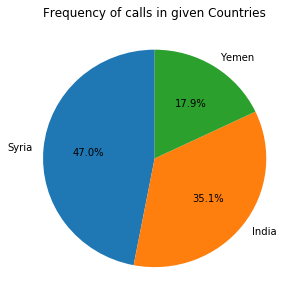

In [5]:
def num_calls(country_path):
    count = 0
    for root, dirs, files in os.walk(country_path):
        for name in files:
            fp = root+'/'+name
            if name.endswith("txt") and ('calllog dump' in name.lower()):
                text_file = open(fp, "r")
                lines = list(text_file.readlines())
                tem = lines[len(lines)-7][1:]
                tem = int(tem.strip())
                count += tem
    return count
                

syria = num_calls("./Isis Admin's Hacked Phones/Syria IS (Admins)")
india = num_calls("./Isis Admin's Hacked Phones/India IS (Admins)")
yemen = num_calls("./Isis Admin's Hacked Phones/Yemen IS (Admins)")

c_name = ['Syria', 'India', 'Yemen']
sizes = [syria,india,yemen]
plt.pie(sizes, labels=c_name, startangle=90, autopct='%.1f%%')
plt.title('Frequency of calls in given Countries')
plt.gcf().set_size_inches((5, 5))
plt.show()

**Syria has the highest number of calls, then India and least in Yemen.**

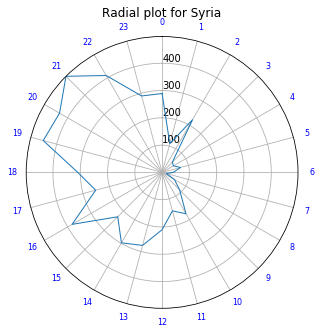

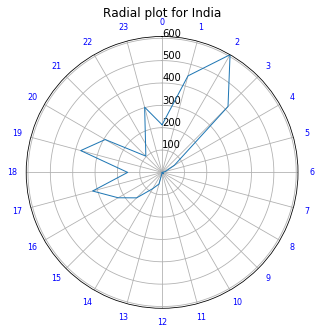

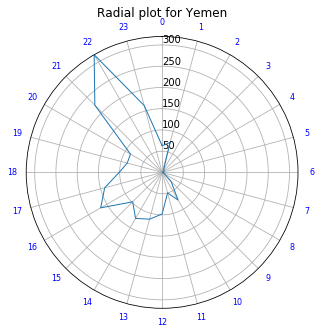

In [10]:
def time_arr(country_path):
    count = 0
    dict_time = {}
    for i in range(24):
        dict_time[i] = 0
    for root, dirs, files in os.walk(country_path):
        for name in files:
            fp = root+'/'+name
            if name.endswith("txt") and ('calllog dump' in name.lower()):
                text_file = open(fp, "r")
                lines = list(text_file.readlines())[5:]
                for line in lines:
                    if 'Date\t' in line:
                        line = line.strip('Date\t:').strip().split(' ')
                        line[4]=line[4].strip('GMT').strip('جرينتش')
                        line = line[1:6]
                        timezone = line[3]
                        line = line[0] +" "+line[1]+" "+line[4]+" "+line[2]
                        line = datetime.datetime.strptime(line, '%b %d %Y %H:%M:%S')
                        timezone = timezone[1:]
                        localtime = line + datetime.timedelta(hours=int(timezone[0:2]),minutes=int(timezone[3:5]))
                        dict_time[int(localtime.hour)]+=1
    return dict_time

def draw_plots(country_time_dict,country_name):
    plt.figure(figsize=(5,5))
    keys = list(country_time_dict.keys())
    values = list(country_time_dict.values())
    N = len(keys)
    x_as = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]
    x_as += x_as[:1]

    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_rlabel_position(0)
    plt.ylim(0, max(values))

    plt.xticks(x_as[:-1],keys, color='blue', size=8)
    plt.title('Radial plot for '+country_name)
    ax.plot(x_as, values, linewidth=1, linestyle='solid')
    ax.fill(x_as, values, 'w', alpha=0.1)
    plt.show()

syria = time_arr("./Isis Admin's Hacked Phones/Syria IS (Admins)")
india = time_arr("./Isis Admin's Hacked Phones/India IS (Admins)")
yemen = time_arr("./Isis Admin's Hacked Phones/Yemen IS (Admins)")

draw_plots(syria,'Syria')
draw_plots(india,'India')
draw_plots(yemen,'Yemen')

- All countries follow different call patterns.
- The time windows for maximum frequency of calls are different as depicted in the above plots.

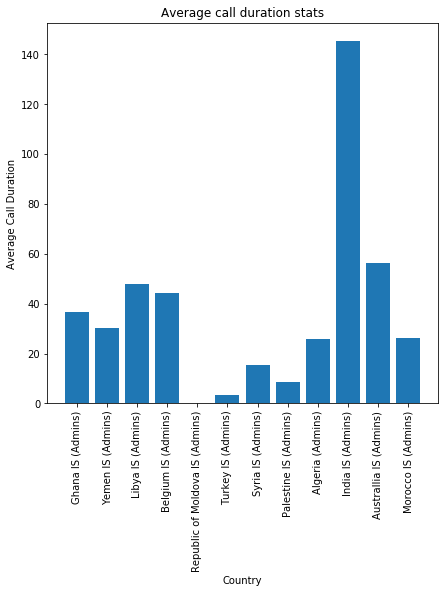

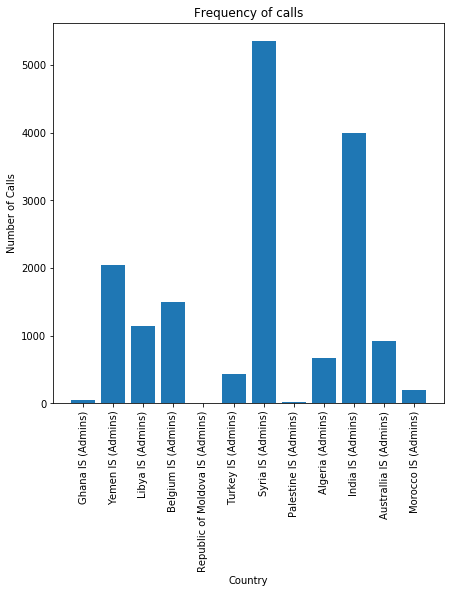

In [7]:
country_avg = {}
country_calls = {}
for root, dirs, files in os.walk(path):
    for name in files:
        fp = root+'/'+name
        country = fp.split('/')[2]
        if 'is using vpn' in country.lower():
            continue
        if name.endswith("txt") and ('calllog dump' in name.lower()):
            text_file = open(fp, "r")
            lines = list(text_file.readlines())
            for line in lines:
                if 'Duration' in line:
                    p = line.strip('Duration:').rstrip(' ').strip('\n')
                    if country in country_avg:
                        country_avg[country]+=int(p)
                        country_calls[country]+=1
                    else:
                        country_avg[country]=int(p)
                        country_calls[country]=1

for i in country_avg:
    country_avg[i] = country_avg[i]/country_calls[i]

plt.bar(range(len(country_avg.values())), country_avg.values(), align='center')
plt.xticks(range(len(country_avg.keys())), country_avg.keys())
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Average call duration stats')
plt.ylabel('Average Call Duration')
plt.gcf().set_size_inches((7, 7))    
plt.show()

plt.bar(range(len(country_calls.values())), country_calls.values(), align='center')
plt.xticks(range(len(country_calls.keys())), country_calls.keys())
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Calls')
plt.title('Frequency of calls')
plt.gcf().set_size_inches((7, 7))    
plt.show()
# print(country_avg)
# print(country_calls)

### Observations:
1. India has the highest average call duration across all countries.
2. Republic of Moldova has the least call duration across all countries.
3. Syria has recieved the highest number of calls.
4. Republic of Moldova has recieved the least number of calls.

**\* We have not taken into consideration the IS data through VPN.**